## 필수과제 2
- 차량에 대한 데이터셋 mpg
- name, origin, brand 등 1차로 정리해서 그걸 갖고 구간 추정 진행
- 소표본이 될 수도 있다. 전반적으로 분석 후 표본 추출할 것
- name에 대한 규칙 찾아 표본을 추출하고 샘플링해서 실제 구간추정 진행
- 아이디어는 자유롭게 진행하되 왜 그렇게 샘플링했는지에 대한 근거, 코드, 시각화 자료는 필수적으로 주석으로 정리해서 업로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
# miles per gallon(연비) 평균이 23이니 20이상 되는 차들의 배기량은 어느정도인지 알아보자!
print(mpg['mpg'].mean())

23.514572864321607


In [16]:
# 연비가 20 이상인 차들 추출
disp_over = mpg[mpg['mpg'] >= 20]

# 표본 크기 설정
sample_size = 80
np.random.seed(3)
disp_sample = disp_over.sample(sample_size)

In [17]:
# 표본의 배기량 평균과 표준오차
sample_mean = disp_sample['displacement'].mean()
sample_std = disp_sample['displacement'].std()
sample_std_error = sample_std / np.sqrt(sample_size)

print("표본평균 (배기량):", sample_mean)
print("표본표준편차 (배기량):", sample_std)
print("표본의 표준오차 (배기량):", sample_std_error)


표본평균 (배기량): 126.9
표본표준편차 (배기량): 52.982825017503956
표본의 표준오차 (배기량): 5.923659918955766


In [20]:

# 신뢰구간 92%
confidence_level = 0.92
confidence_interval = stats.t.interval(confidence_level, df=sample_size-1, loc=sample_mean, scale=sample_std_error)
print("신뢰구간 (배기량):", confidence_interval)

# 결과 출력
print(f'표본평균 (배기량): {sample_mean:.2f}')
print(f'표본표준편차 (배기량): {sample_std:.2f}')
print(f'표본의 표준오차 (배기량): {sample_std_error:.2f}')
print(f'신뢰구간 (배기량): {confidence_interval}')


신뢰구간 (배기량): (116.3943990369791, 137.4056009630209)
표본평균 (배기량): 126.90
표본표준편차 (배기량): 52.98
표본의 표준오차 (배기량): 5.92
신뢰구간 (배기량): (116.3943990369791, 137.4056009630209)


In [21]:
# 모집단의 배기량 평균
population_mean = mpg['displacement'].mean()
print("모집단의 배기량 평균:", population_mean)


모집단의 배기량 평균: 193.42587939698493


# 결과 해석
- population 대비 표본은 397개 중 80개만 선정 (1/5)
- 신뢰구간 92% 초록구간 안에 표본평균은 들어가지만 모평균이 벗어난 이유? -> 표본평균은 mpg 20이상의 표본만있고 모평균은 모든 배기량의 평균이기 때문

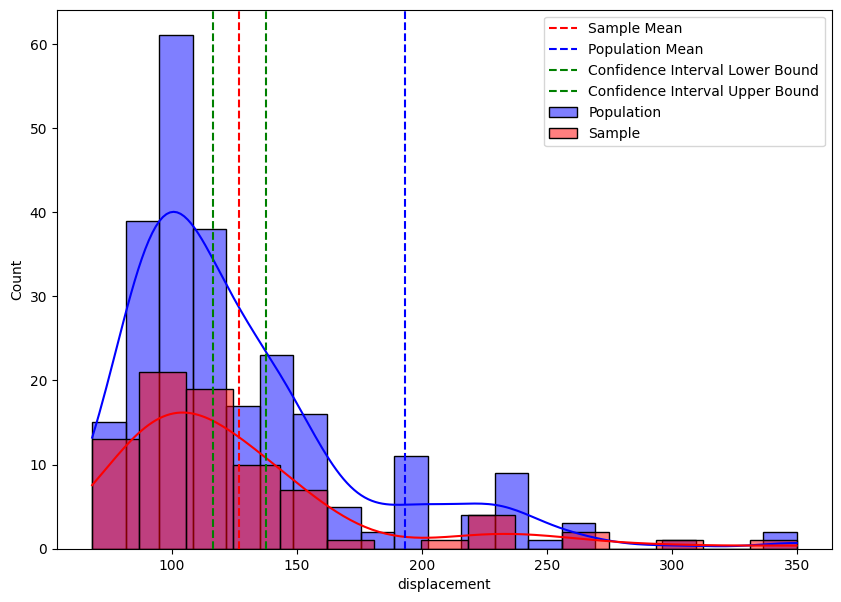

In [22]:
# 시각화를 통해 그래프 그려보기: 모집단의 분포를 알아보기-> 마력이 20이상 되는 80개의 평균의 배기량이 전체 배기량보다 훨씬 적다
plt.figure(figsize=(10, 7))
sns.histplot(disp_over['displacement'], kde=True, color='blue', label='Population')
sns.histplot(disp_sample['displacement'], kde=True, color='red', label='Sample', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(population_mean, color='blue', linestyle='--', label='Population Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Confidence Interval Upper Bound')
plt.legend()
plt.show()

## 배기량이 20인 차만을 뽑아 모평균을 다시 만들어보자

In [29]:
# mpg가 20이상인 차를 모집단으로 설정한다면 -> 신뢰구간안에 모평균이 들어오는걸 확인할 수 있다
population = mpg[mpg['mpg'] >= 20]
over_mean = population['displacement'].mean()
print("연비가 20 이상인 차들의 배기량 평균 (모집단):", population['displacement'].mean())

연비가 20 이상인 차들의 배기량 평균 (모집단): 127.51214574898785


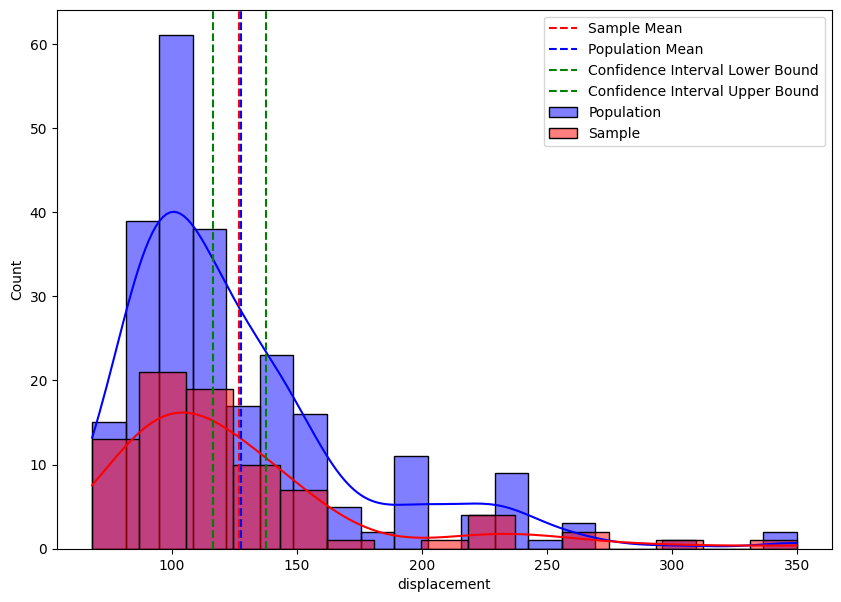

In [30]:
# 시각화를 통해 그래프 그려보기: 모집단의 분포를 알아보기-> 마력이 20이상 되는 80개의 평균의 배기량이 전체 배기량보다 훨씬 적다
plt.figure(figsize=(10, 7))
sns.histplot(disp_over['displacement'], kde=True, color='blue', label='Population')
sns.histplot(disp_sample['displacement'], kde=True, color='red', label='Sample', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(over_mean, color='blue', linestyle='--', label='Population Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Confidence Interval Upper Bound')
plt.legend()
plt.show()

## 전체코드

전체 데이터의 연비 평균: 23.514572864321607
표본평균 (배기량): 126.9
표본표준편차 (배기량): 52.982825017503956
표본의 표준오차 (배기량): 5.923659918955766
신뢰구간 (배기량): (116.3943990369791, 137.4056009630209)
표본평균 (배기량): 126.90
표본표준편차 (배기량): 52.98
표본의 표준오차 (배기량): 5.92
신뢰구간 (배기량): (116.3943990369791, 137.4056009630209)
모집단의 배기량 평균: 193.42587939698493


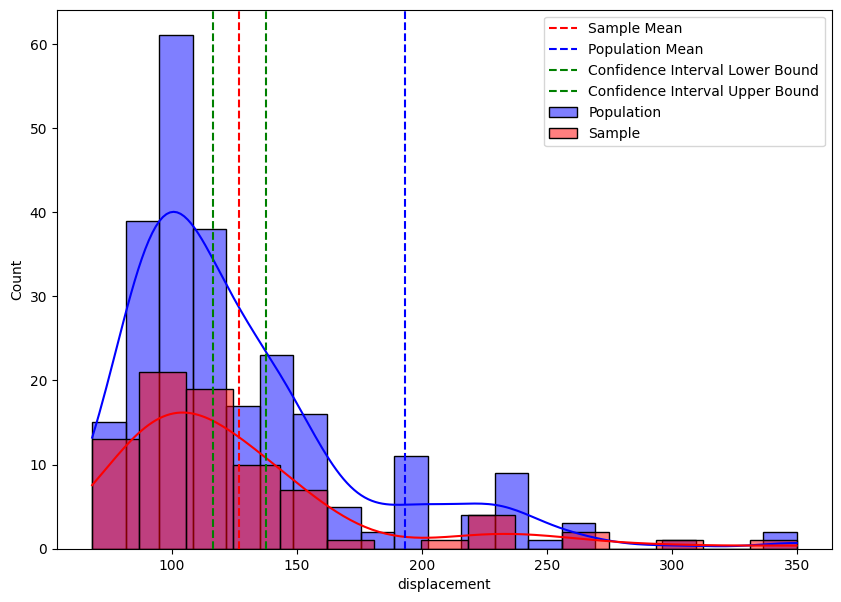

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# mpg 데이터셋 불러오기
mpg = sns.load_dataset('mpg').dropna(subset=['displacement'])

# 연비 평균 확인
print("전체 데이터의 연비 평균:", mpg['mpg'].mean())

# 연비가 20 이상인 차들 추출
disp_over = mpg[mpg['mpg'] >= 20]

# 표본 크기 설정
sample_size = 80
np.random.seed(3)
disp_sample = disp_over.sample(sample_size)

# 표본의 배기량 평균과 표준오차
sample_mean = disp_sample['displacement'].mean()
sample_std = disp_sample['displacement'].std()
sample_std_error = sample_std / np.sqrt(sample_size)

print("표본평균 (배기량):", sample_mean)
print("표본표준편차 (배기량):", sample_std)
print("표본의 표준오차 (배기량):", sample_std_error)

# 신뢰구간 92%
confidence_level = 0.92
confidence_interval = stats.t.interval(confidence_level, df=sample_size-1, loc=sample_mean, scale=sample_std_error)
print("신뢰구간 (배기량):", confidence_interval)

# 결과 출력
print(f'표본평균 (배기량): {sample_mean:.2f}')
print(f'표본표준편차 (배기량): {sample_std:.2f}')
print(f'표본의 표준오차 (배기량): {sample_std_error:.2f}')
print(f'신뢰구간 (배기량): {confidence_interval}')

# 모집단의 배기량 평균
population_mean = mpg['displacement'].mean()
print("모집단의 배기량 평균:", population_mean)

# 시각화를 통해 그래프 그려보기: 모집단의 분포를 알아보기
plt.figure(figsize=(10, 7))
sns.histplot(disp_over['displacement'], kde=True, color='blue', label='Population')
sns.histplot(disp_sample['displacement'], kde=True, color='red', label='Sample', alpha=0.5)
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(population_mean, color='blue', linestyle='--', label='Population Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Confidence Interval Upper Bound')
plt.legend()
plt.show()
